In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# $\frac{du}{dt}=2cos(u)+4sin(u)$ \\
$F(u)=4sin(u)$

In [6]:
import numpy as np

## solver ###
T=10000

dt=0.05
N=1
u=np.zeros([N,T])

## initial condition ####

for i in range(0,N):
  u[i,0]=(np.cos(i))


### Training data #####
# for k in range(1,T):
#     u[:,k]=u[:,k-1]+(np.cos(u[:,k-1]))*dt*k*dt+0.03*np.exp(-u[:,k-1])*dt

for k in range(1,T):
    u[:,k]=u[:,k-1]+(np.cos(dt*k)*dt)+3*np.exp(-u[:,k-1])*dt


u=u[:,4000:6000]


#mu = np.mean(u.flatten())
#sigma = np.std(u.flatten())
mu=0.0
sigma=1.0

In [26]:
def diff_solver(u0,m,phi,t):
  #v=np.zeros([N,m])
  #v[:,0]=u0.flatten()
  #for k in range(1,m):
      #v[:,k]=v[:,k-1]+(np.cos(v[:,k-1]))*dt+phi*dt
  v = u0+(np.cos(t*dt))+phi*dt
  return v 

<Figure size 432x288 with 0 Axes>

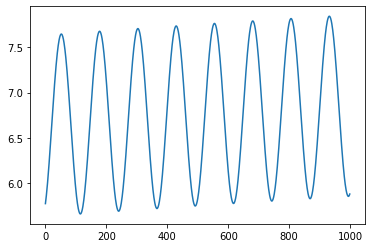

In [27]:
import matplotlib.pyplot as plt
plt.figure(1)



plt.figure(2)
plt.plot(u[0,0:1000])





In [28]:
import keras
from keras.layers import Input, Dense, Lambda
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adagrad, Adadelta
from keras.callbacks import History
history = History()

###########
trainN=1000
train_input = u[:,0:trainN]
##############
def swish(x):
   beta = 1.0
   return beta * x * keras.backend.sigmoid(x)


input_shape =np.size(u,0)
hidden_size=100
input_data = Input(shape=(input_shape,))
x = Dense(hidden_size, activation='relu')(input_data)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(input_shape, activation=None)(x)

neural_net= Model (input_data,x)
neural_net.compile(loss='mse',optimizer='adam')
neural_net.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               1010

In [29]:
#### Training ########
time_step=int(1)
for loop in range(1,trainN):
 print('loop', loop)
 if (loop==1): 
  flux = neural_net.predict(((u[:,0]-mu)/sigma).reshape([1,input_shape]))  
  pred_nextime = diff_solver(u[:,0].reshape([input_shape,1]),1,flux*sigma+mu,loop)
  hist = neural_net.fit((pred_nextime.reshape([1,input_shape])-mu)/sigma, (u[:,loop].reshape([1,input_shape])-mu)/sigma,
                       batch_size = 1,
             verbose=1,
             epochs = 1,
             callbacks=[keras.callbacks.ModelCheckpoint('best_weights.h5',
                                                    verbose=1),history]
             )
  
 else:
  neural_net.load_weights('best_weights.h5')
  flux = neural_net.predict((((pred_nextime-mu))/sigma).reshape([1,input_shape]))  
  pred_nextime = diff_solver(pred_nextime.reshape([input_shape,1]),1,flux*mu+sigma,loop)
  hist = neural_net.fit((pred_nextime.reshape([1,input_shape])-mu)/sigma, (u[:,loop].reshape([1,input_shape])-mu)/sigma,
                       batch_size = 1,
             verbose=1,
             epochs = 1,
             callbacks=[keras.callbacks.ModelCheckpoint('best_weights.h5',
                                                    verbose=1),history]
             )

loop 1
1/1 [==============================] - 1s 711ms/step - loss: 32.4923

Epoch 00001: saving model to best_weights.h5
loop 2
1/1 [==============================] - 0s 4ms/step - loss: 29.6751

Epoch 00001: saving model to best_weights.h5
loop 3
1/1 [==============================] - 0s 6ms/step - loss: 26.2405

Epoch 00001: saving model to best_weights.h5
loop 4
1/1 [==============================] - 0s 4ms/step - loss: 21.8222

Epoch 00001: saving model to best_weights.h5
loop 5
1/1 [==============================] - 0s 4ms/step - loss: 16.4802

Epoch 00001: saving model to best_weights.h5
loop 6
1/1 [==============================] - 0s 6ms/step - loss: 10.3919

Epoch 00001: saving model to best_weights.h5
loop 7
1/1 [==============================] - 0s 4ms/step - loss: 4.4619

Epoch 00001: saving model to best_weights.h5
loop 8
1/1 [==============================] - 0s 4ms/step - loss: 0.3761

Epoch 00001: saving model to best_weights.h5
loop 9
1/1 [============================

In [7]:
#  neural_net.load_weights('best_weights.h5')
#  flux = neural_net.predict((((u[:,loop-1]-mu))/sigma).reshape([1,input_shape]))  
#  pred_nextime = diff_solver(u[:,loop-1].reshape([input_shape,1]),1,flux*mu+sigma)
#  hist = neural_net.fit((pred_nextime.reshape([1,input_shape])-mu)/sigma, (u[:,loop].reshape([1,input_shape])-mu)/sigma,
#                       batch_size = 1,
#             verbose=1,
#             epochs = 5,
#             callbacks=[keras.callbacks.ModelCheckpoint('best_weights.h5',
#                                                    verbose=1),history]
#             )

Parameterization tests in offline model. 

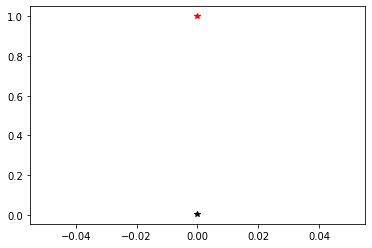

In [30]:
u_test = u[:,trainN:]
neural_net.load_weights('best_weights.h5')
flux_truth = 3*np.exp(-u_test[:,100])
flux_pred = neural_net.predict(((u_test[:,100]-mu)/sigma).reshape([1,input_shape]))

plt.plot(flux_truth,'k*')
plt.plot(flux_pred[0,:]*mu+sigma,'r*')


In [36]:
neural_net.predict(((u_test[:,100]-mu)/sigma).reshape([1,input_shape]))

array([[1.1974856]], dtype=float32)

Parameterization tests in online mode

In [31]:
t=1000
upred_online=np.zeros([N,t])
upred_online[:,0] = u_test[:,0].flatten()
for k in range(1,t):

   upred_online[:,k] = (diff_solver(upred_online[:,k-1],1,(neural_net.predict(((upred_online[:,k-1]-mu)/sigma).reshape([1,input_shape])).reshape([input_shape,1]))*sigma+mu,k)).flatten()


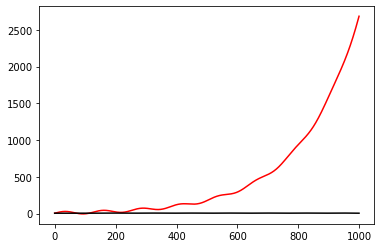

In [32]:
t=30
plt.plot(upred_online[0,0:1000],'r')
plt.plot(u_test[0,0:1000],'k')



In [24]:
upred_online[0,1]

5.8928503046475464